<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
## Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#import normalizer
from sklearn.preprocessing import StandardScaler

# import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

#import tensorflow
import tensorflow as tf
from tensorflow.keras import layers

#viz
import seaborn as sns

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# insert code here
df = load_diabetes()

In [3]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [4]:
# define standard scaler
scaler = StandardScaler()

In [5]:
# Prepare input data
# input
X = df.data.astype(np.uint8)
n_cols = X.shape[1]

# output
target = df.target.astype(np.uint8)

In [6]:
y = df.target

In [7]:
# transform data
X = scaler.fit_transform(X)

### Split the data (training/test)

In [8]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, target, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [9]:
# insert code here
# Set up the model architecture / this is for Regression
model = Sequential()

2021-09-11 17:05:40.259852: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Add the first hidden layer
model.add(Dense(100, activation = 'relu', input_dim = (n_cols)))
# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [12]:
optimizer=tf.optimizers.Adam(learning_rate=0.1)
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = 'mean_squared_error',
    metrics = ['mean_squared_error'])

### Fit the training data

In [17]:
%%time
history = model.fit(
    X_train, y_train,
    epochs=100,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 0s 22ms/step - loss: 4358.2754 - mean_squared_error: 4358.2754 - val_loss: 4733.8291 - val_mean_squared_error: 4733.8291
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 4358.4736 - mean_squared_error: 4358.4736 - val_loss: 4733.6714 - val_mean_squared_error: 4733.6714
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 4358.4463 - mean_squared_error: 4358.4463 - val_loss: 4733.7119 - val_mean_squared_error: 4733.7119
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 4358.5054 - mean_squared_error: 4358.5054 - val_loss: 4733.6226 - val_mean_squared_error: 4733.6226
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 4358.4004 - mean_squared_error: 4358.4004 - val_loss: 4733.6748 - val_mean_squared_error: 4733.6748
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 4358.3970 - mean_squared_error: 4358.3970 - val_loss: 4733.6782 - val

8/8 [==============================] - 0s 11ms/step - loss: 4358.3281 - mean_squared_error: 4358.3281 - val_loss: 4734.1709 - val_mean_squared_error: 4734.1709
Epoch 49/100
8/8 [==============================] - 0s 10ms/step - loss: 4358.3193 - mean_squared_error: 4358.3193 - val_loss: 4734.2007 - val_mean_squared_error: 4734.2007
Epoch 50/100
8/8 [==============================] - 0s 9ms/step - loss: 4358.3369 - mean_squared_error: 4358.3369 - val_loss: 4734.1865 - val_mean_squared_error: 4734.1865
Epoch 51/100
8/8 [==============================] - 0s 9ms/step - loss: 4358.6050 - mean_squared_error: 4358.6050 - val_loss: 4734.3325 - val_mean_squared_error: 4734.3325
Epoch 52/100
8/8 [==============================] - 0s 11ms/step - loss: 4358.3223 - mean_squared_error: 4358.3223 - val_loss: 4734.2803 - val_mean_squared_error: 4734.2803
Epoch 53/100
8/8 [==============================] - 0s 9ms/step - loss: 4358.3555 - mean_squared_error: 4358.3555 - val_loss: 4734.3057 - val_mean_squ

8/8 [==============================] - 0s 9ms/step - loss: 4358.3184 - mean_squared_error: 4358.3184 - val_loss: 4734.4751 - val_mean_squared_error: 4734.4751
Epoch 96/100
8/8 [==============================] - 0s 10ms/step - loss: 4358.3066 - mean_squared_error: 4358.3066 - val_loss: 4734.4663 - val_mean_squared_error: 4734.4663
Epoch 97/100
8/8 [==============================] - 0s 11ms/step - loss: 4358.3203 - mean_squared_error: 4358.3203 - val_loss: 4734.4253 - val_mean_squared_error: 4734.4253
Epoch 98/100
8/8 [==============================] - 0s 10ms/step - loss: 4358.3926 - mean_squared_error: 4358.3926 - val_loss: 4734.4834 - val_mean_squared_error: 4734.4834
Epoch 99/100
8/8 [==============================] - 0s 10ms/step - loss: 4358.3438 - mean_squared_error: 4358.3438 - val_loss: 4734.3970 - val_mean_squared_error: 4734.3970
Epoch 100/100
8/8 [==============================] - 0s 9ms/step - loss: 4358.3501 - mean_squared_error: 4358.3501 - val_loss: 4734.3276 - val_mean_s

### Create predictions

In [14]:
# insert code here
predictions = model.predict(X_test)
predictions

array([[65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.78317],
       [65.7

### Evaluate the model

In [15]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

14/14 [==============================] - 0s 2ms/step - loss: 7492.3726 - mean_squared_error: 7492.3726

Test loss: 7492.372559, Test accuracy: 7492.372559


### Visualisation of cost

In [16]:
history = model.fit(X_train, y_train, epochs=250, batch_size=1, verbose=1, validation_split=0.2)

Epoch 1/250
247/247 [==============================] - 1s 4ms/step - loss: 6195.6313 - mean_squared_error: 6195.6313 - val_loss: 5850.4849 - val_mean_squared_error: 5850.4849
Epoch 2/250
247/247 [==============================] - 1s 3ms/step - loss: 5323.2842 - mean_squared_error: 5323.2842 - val_loss: 5284.2202 - val_mean_squared_error: 5284.2202
Epoch 3/250
247/247 [==============================] - 1s 3ms/step - loss: 4857.7910 - mean_squared_error: 4857.7910 - val_loss: 4989.6489 - val_mean_squared_error: 4989.6489
Epoch 4/250
247/247 [==============================] - 1s 4ms/step - loss: 4622.5337 - mean_squared_error: 4622.5337 - val_loss: 4849.2334 - val_mean_squared_error: 4849.2334
Epoch 5/250
247/247 [==============================] - 1s 4ms/step - loss: 4494.7930 - mean_squared_error: 4494.7930 - val_loss: 4781.6758 - val_mean_squared_error: 4781.6758
Epoch 6/250
247/247 [==============================] - 1s 4ms/step - loss: 4427.2319 - mean_squared_error: 4427.2319 - val_lo

247/247 [==============================] - 1s 4ms/step - loss: 4365.1372 - mean_squared_error: 4365.1372 - val_loss: 4737.2402 - val_mean_squared_error: 4737.2402
Epoch 48/250
247/247 [==============================] - 1s 4ms/step - loss: 4364.0615 - mean_squared_error: 4364.0615 - val_loss: 4737.4717 - val_mean_squared_error: 4737.4717
Epoch 49/250
247/247 [==============================] - 1s 4ms/step - loss: 4365.2427 - mean_squared_error: 4365.2427 - val_loss: 4736.2959 - val_mean_squared_error: 4736.2959
Epoch 50/250
247/247 [==============================] - 2s 7ms/step - loss: 4365.4878 - mean_squared_error: 4365.4878 - val_loss: 4732.8457 - val_mean_squared_error: 4732.8457
Epoch 51/250
247/247 [==============================] - 1s 5ms/step - loss: 4363.9717 - mean_squared_error: 4363.9717 - val_loss: 4733.5952 - val_mean_squared_error: 4733.5952
Epoch 52/250
247/247 [==============================] - 1s 4ms/step - loss: 4364.1724 - mean_squared_error: 4364.1724 - val_loss: 473

247/247 [==============================] - 1s 5ms/step - loss: 4363.3325 - mean_squared_error: 4363.3325 - val_loss: 4735.4365 - val_mean_squared_error: 4735.4365
Epoch 94/250
247/247 [==============================] - 1s 4ms/step - loss: 4362.1987 - mean_squared_error: 4362.1987 - val_loss: 4736.1860 - val_mean_squared_error: 4736.1860
Epoch 95/250
247/247 [==============================] - 1s 4ms/step - loss: 4364.0298 - mean_squared_error: 4364.0298 - val_loss: 4734.5942 - val_mean_squared_error: 4734.5942
Epoch 96/250
247/247 [==============================] - 1s 5ms/step - loss: 4365.5718 - mean_squared_error: 4365.5718 - val_loss: 4734.4165 - val_mean_squared_error: 4734.4165
Epoch 97/250
247/247 [==============================] - 1s 5ms/step - loss: 4365.0693 - mean_squared_error: 4365.0693 - val_loss: 4735.9912 - val_mean_squared_error: 4735.9912
Epoch 98/250
247/247 [==============================] - 1s 5ms/step - loss: 4361.8354 - mean_squared_error: 4361.8354 - val_loss: 473

247/247 [==============================] - 2s 7ms/step - loss: 4366.8384 - mean_squared_error: 4366.8384 - val_loss: 4734.3691 - val_mean_squared_error: 4734.3691
Epoch 140/250
247/247 [==============================] - 1s 5ms/step - loss: 4366.4009 - mean_squared_error: 4366.4009 - val_loss: 4732.9692 - val_mean_squared_error: 4732.9692
Epoch 141/250
247/247 [==============================] - 1s 6ms/step - loss: 4362.1694 - mean_squared_error: 4362.1694 - val_loss: 4733.7524 - val_mean_squared_error: 4733.7524
Epoch 142/250
247/247 [==============================] - 2s 9ms/step - loss: 4363.9126 - mean_squared_error: 4363.9126 - val_loss: 4735.7173 - val_mean_squared_error: 4735.7173
Epoch 143/250
247/247 [==============================] - 3s 12ms/step - loss: 4365.3794 - mean_squared_error: 4365.3794 - val_loss: 4737.2808 - val_mean_squared_error: 4737.2808
Epoch 144/250
247/247 [==============================] - 1s 5ms/step - loss: 4364.9170 - mean_squared_error: 4364.9170 - val_los

247/247 [==============================] - 1s 2ms/step - loss: 4364.5562 - mean_squared_error: 4364.5562 - val_loss: 4735.2095 - val_mean_squared_error: 4735.2095
Epoch 186/250
247/247 [==============================] - 1s 2ms/step - loss: 4363.4844 - mean_squared_error: 4363.4844 - val_loss: 4735.4707 - val_mean_squared_error: 4735.4707
Epoch 187/250
247/247 [==============================] - 1s 2ms/step - loss: 4361.9355 - mean_squared_error: 4361.9355 - val_loss: 4733.8032 - val_mean_squared_error: 4733.8032
Epoch 188/250
247/247 [==============================] - 1s 2ms/step - loss: 4366.7344 - mean_squared_error: 4366.7344 - val_loss: 4734.2769 - val_mean_squared_error: 4734.2769
Epoch 189/250
247/247 [==============================] - 1s 2ms/step - loss: 4364.4014 - mean_squared_error: 4364.4014 - val_loss: 4734.9331 - val_mean_squared_error: 4734.9331
Epoch 190/250
247/247 [==============================] - 1s 2ms/step - loss: 4363.8945 - mean_squared_error: 4363.8945 - val_loss

247/247 [==============================] - 1s 2ms/step - loss: 4362.1440 - mean_squared_error: 4362.1440 - val_loss: 4735.5332 - val_mean_squared_error: 4735.5332
Epoch 232/250
247/247 [==============================] - 1s 4ms/step - loss: 4365.1328 - mean_squared_error: 4365.1328 - val_loss: 4734.6553 - val_mean_squared_error: 4734.6553
Epoch 233/250
247/247 [==============================] - 1s 2ms/step - loss: 4364.9819 - mean_squared_error: 4364.9819 - val_loss: 4734.9600 - val_mean_squared_error: 4734.9600
Epoch 234/250
247/247 [==============================] - 1s 3ms/step - loss: 4364.3369 - mean_squared_error: 4364.3369 - val_loss: 4734.1421 - val_mean_squared_error: 4734.1421
Epoch 235/250
247/247 [==============================] - 1s 3ms/step - loss: 4362.7915 - mean_squared_error: 4362.7915 - val_loss: 4733.3564 - val_mean_squared_error: 4733.3564
Epoch 236/250
247/247 [==============================] - 1s 2ms/step - loss: 4362.8916 - mean_squared_error: 4362.8916 - val_loss

In [289]:
print(history)

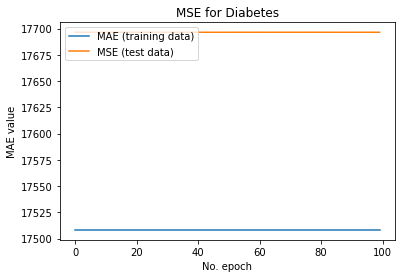

In [314]:
# Plot history: MAE
plt.plot(history.history['val_mean_squared_error'], label='MAE (training data)')
plt.plot(history.history['mean_squared_error'], label='MSE (test data)')
plt.title('MSE for Diabetes')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [303]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
95,17696.476562,17696.476562,17508.201172,17508.201172,95
96,17696.474609,17696.474609,17508.201172,17508.201172,96
97,17696.476562,17696.476562,17508.201172,17508.201172,97
98,17696.474609,17696.474609,17508.201172,17508.201172,98
99,17696.474609,17696.474609,17508.201172,17508.201172,99


### Visualisation of residuals

In [309]:
test_results = {}

test_results['model'] = model.evaluate(
    X_test,
    verbose=0)




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



